# Total time Function

this is the Function calculating the total time required for manufactiring and its Assembly for all model

In [132]:
def totalTime(timeMappings , order):
    timeMan =0
    timeAss =0
    idleTime =0
    timeManStart =[]
    timeAssStart =[]
    for i in order:
        timeManStart.append(timeMan)
        timeMan += int(timeMappings[i]['man'])
        if timeMan>=timeAss:
            currIdle = timeMan - timeAss
            idleTime += currIdle
            timeAssStart.append(timeAss+currIdle)
            timeAss += (currIdle+ int(timeMappings[i]['ass']))
        else:
            timeAssStart.append(timeAss)
            timeAss += timeMappings[i]['ass']
            
    totalTime = 0
    if timeMan>timeAss:
        totalTime = timeMan
    else:
        totalTime = timeAss
    return totalTime,idleTime,timeManStart,timeAssStart

# Importing files and data preprocessing

this is the section where we import data from the file and do some preprocessing stuffs

In [133]:
file = open("input.txt").read().split("\n")
data = {}
for i in file:
    record = i.split(" / ")
    data[int(record[0])]={
            'man' : int(record[1]),
            'ass': int(record[2])
        }
print(data)
keys = data.keys()
model =[]
man =[]
#ass =[]
for i in keys:
    model.append(i)
for i in range(0,len(model)):
    man.append(data[model[i]]['man'])
    #ass.append(data[model[i]]['ass'])



{1: {'man': 5, 'ass': 7}, 2: {'man': 1, 'ass': 2}, 3: {'man': 8, 'ass': 2}, 4: {'man': 5, 'ass': 4}, 5: {'man': 3, 'ass': 7}, 6: {'man': 4, 'ass': 4}}


# Finding the Order of the Manufacturing Using Greedy Programming Techneque

In [134]:
n = len(model)
for i in range(n):
    for j in range(0, n-i-1):
        if man[j] > man[j+1] :
            model[j], model[j+1] = model[j+1], model[j]
            man[j], man[j+1] = man[j+1], man[j]
            ass[j], ass[j+1] = ass[j+1], ass[j]


import numpy as np

order = np.copy(model)
print(order)


[2 5 6 1 4 3]


In [135]:
totalTime,idleTime,manStartTimes,assStartTimes = totalTime(data,order)
print("Order of Manufacturung:" +str(order))
print("Total production time for all mobiles is: "+str(totalTime))
print("Idle Time: "+ str(idleTime))

Order of Manufacturung:[2 5 6 1 4 3]
Total production time for all mobiles is: 28
Idle Time: 2




Order of Manufacturung:[2 5 6 1 4 3]
Total production time for all mobiles is: 28
Idle Time: 2


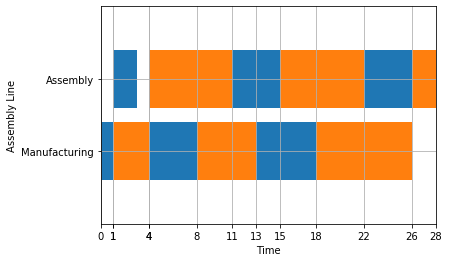

In [137]:
# Importing the matplotlb.pyplot 
def Union(lst1, lst2,list3): 
    final_list = lst1 + lst2+list3 
    return final_list 
import matplotlib.pyplot as plt 

fig, gnt = plt.subplots() 

# Setting Y-axis limits 
gnt.set_ylim(0, 15)  
gnt.set_xlim(0, totalTime) 
gnt.set_xlabel('Time') 
gnt.set_ylabel('Assembly Line')  
gnt.set_yticks([5, 10])
gnt.set_xticks(Union(manStartTimes,assStartTimes,[totalTime]))
gnt.set_yticklabels(['Manufacturing', 'Assembly']) 
gnt.grid(True)
alt = True
for i in range(0,len(order)):
    if(alt):
        alt = False
        gnt.broken_barh([(manStartTimes[i], data[order[i]]['man'])], (3, 4), facecolors =('tab:blue'))
        gnt.broken_barh([(assStartTimes[i], data[order[i]]['ass'])], (8, 4),facecolors ='tab:blue')
    else:
        alt = True
        gnt.broken_barh([(manStartTimes[i], data[order[i]]['man'])], (3, 4), facecolors =('tab:orange'))
        gnt.broken_barh([(assStartTimes[i], data[order[i]]['ass'])], (8, 4),facecolors ='tab:orange')
print("\n\nOrder of Manufacturung:" +str(order))
print("Total production time for all mobiles is: "+str(totalTime))
print("Idle Time: "+ str(idleTime))

# Implementing Genetic Algorithm for Optimisation